In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 로드 및 구조 확인
iris = sns.load_dataset('iris')

print("=== Head ===")
print(iris.head())
print("\n=== Info ===")
print(iris.info())

=== Head ===
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

=== Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
# 2. 기술통계량 (Species별 Petal Length을 분석)
# 평균, 개수, 표준편차 및 최소, 최대, 사분위수 확인
desc_stats = iris.groupby('species')['petal_length'].describe()
print("\n=== Descriptive Statistics (Petal Length by Species) ===")
print(desc_stats)


=== Descriptive Statistics (Petal Length by Species) ===
            count   mean       std  min  25%   50%    75%  max
species                                                       
setosa       50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9


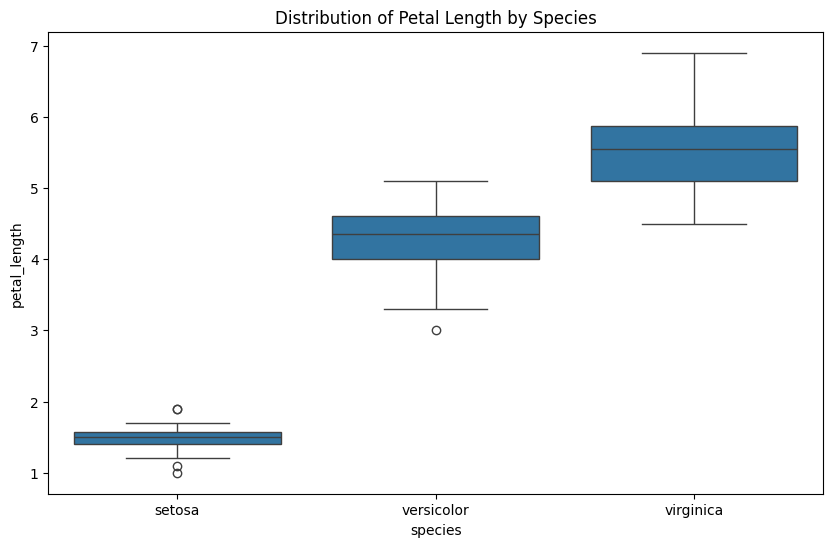

In [ ]:
# 3. 시각화 (Boxplot 포함)
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal_length', data=iris)
plt.title('Distribution of Petal Length by Species')
plt.show()

In [ ]:
from scipy import stats

# 4. 정규성 검정 (Shapiro-Wilk)
print("\n=== Shapiro-Wilk Test (Normality) ===")
species_list = iris['species'].unique()

for sp in species_list:
    stat, p_val = stats.shapiro(iris[iris['species'] == sp]['petal_length'])
    print(f"Species: {sp}, p-value: {p_val:.5f}")


=== Shapiro-Wilk Test (Normality) ===
Species: setosa, p-value: 0.05481
Species: versicolor, p-value: 0.15848
Species: virginica, p-value: 0.10978


In [ ]:
# 5. 등분산성 검정 (Levene)
print("\n=== Levene Test (Homoscedasticity) ===")
# 각 종별 데이터 분리
setosa = iris[iris['species'] == 'setosa']['petal_length']
versicolor = iris[iris['species'] == 'versicolor']['petal_length']
virginica = iris[iris['species'] == 'virginica']['petal_length']

stat, p_val = stats.levene(setosa, versicolor, virginica)
print(f"Levene Result: p-value: {p_val:.10f}")


=== Levene Test (Homoscedasticity) ===
Levene Result: p-value: 0.0000000313


In [ ]:
# 7. One-way ANOVA
f_stat, p_val = stats.f_oneway(setosa, versicolor, virginica)
print(f"\n=== One-way ANOVA ===\nF-statistic: {f_stat:.5f}, p-value: {p_val:.5e}")


=== One-way ANOVA ===
F-statistic: 1180.16118, p-value: 2.85678e-91


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 8. 사후검정 (Tukey HSD)
print("\n=== Tukey HSD Post-hoc Test ===")
tukey = pairwise_tukeyhsd(endog=iris['petal_length'], groups=iris['species'], alpha=0.05)
print(tukey)


=== Tukey HSD Post-hoc Test ===
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 10. 회귀 분석
# 입력: sepal_length, sepal_width, petal_width
# 타겟: petal_length

X = iris[['sepal_length', 'sepal_width', 'petal_width']]
y = iris['petal_length']

# Train/Test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가 및 해석
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coef = model.coef_

print("\n=== Linear Regression Results ===")
print(f"MSE: {mse:.5f}")
print(f"R^2 Score: {r2:.5f}")
print(f"Coefficients: {coef}")
print(f"Features: {X.columns.tolist()}")


=== Linear Regression Results ===
MSE: 0.13002
R^2 Score: 0.96033
Coefficients: [ 0.72281463 -0.63581649  1.46752403]
Features: ['sepal_length', 'sepal_width', 'petal_width']
